In [1]:
# @author: Praveen Dominic
#KNN
!conda activate base

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Classified Data.csv", usecols=range(1,12))
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 10), (200, 10), (800,), (200,))

In [17]:
# Lets now scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)

y_pred = kn.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(f"CONFUSION MATRIX: {confusion_matrix(y_test, y_pred)}")
print(f"CLASSIFICATION REPORT: {classification_report(y_test, y_pred)}")

CONFUSION MATRIX: [[86 10]
 [ 7 97]]
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.92      0.90      0.91        96
           1       0.91      0.93      0.92       104

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
#Lets find the optimal parameters using grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1,40),
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'weights' : ['uniform', 'distance'],
    'leaf_size' : [2,4,5,6,8,10,12,14,16,18,20]
}

gs = GridSearchCV(estimator = kn, param_grid=param_grid,scoring='accuracy',cv=10, n_jobs=-1).fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)


{'algorithm': 'brute', 'leaf_size': 2, 'n_neighbors': 28, 'weights': 'uniform'}
0.94625


In [34]:
knn = KNeighborsClassifier(algorithm='brute', leaf_size=2, n_neighbors=28, weights='uniform')
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)
from sklearn.metrics import confusion_matrix, classification_report
print(f"CONFUSION MATRIX: {confusion_matrix(y_test, y_pred)}")
print(f"CLASSIFICATION REPORT: {classification_report(y_test, y_pred)}")

CONFUSION MATRIX: [[86 10]
 [ 6 98]]
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.93      0.90      0.91        96
           1       0.91      0.94      0.92       104

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
# It is observed that the accuracy has increased with the usage of params returned by the paramgrid
# Lets try to plot the error rates for different K-values and see which is the best

In [46]:
from sklearn.model_selection import cross_val_score
error_rate_test = []
error_rate_train = []

for i in range(1,41):
    kn = KNeighborsClassifier(n_neighbors = i,algorithm='brute', leaf_size=2, weights='uniform')
    kn.fit(X_train_sc, y_train)
    y_pred = kn.predict(X_test_sc)
    cv_acc = cross_val_score(estimator = kn, X = X_test_sc, y = y_test, scoring = 'accuracy', cv=10).mean()
    error_rate_test.append(1-round(cv_acc,2))

    y_pred = kn.predict(X_train_sc)
    cv_acc = cross_val_score(estimator = kn, X = X_train_sc, y = y_train, scoring = 'accuracy', cv=10).mean()
    error_rate_train.append(1-round(cv_acc,2))

# print(error_rate)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

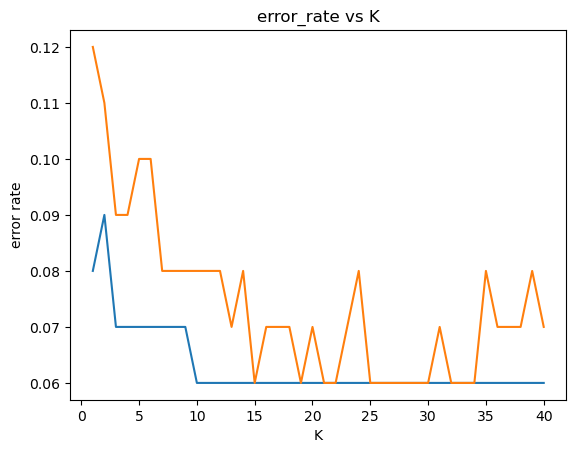

In [48]:
plt.title("error_rate vs K")
plt.xlabel("K")
plt.ylabel('error rate')
plt.plot(range(1,41), error_rate_train)
plt.plot(range(1,41), error_rate_test)

In [49]:
#We can now confirm that K = 28 is the sweet spot that has both the values of train error and test error rates the least, as tst eror starts increasing after that